### 단순 선형 회귀

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
from matplotlib import rc, rcParams, font_manager 
#!find / -name "*Nanum*.ttf"
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf'
fontName = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=fontName)

import seaborn as sns

from sklearn.datasets import load_wine, load_iris
import warnings 
warnings.filterwarnings('ignore')

pd.set_option("display.float_format", "{:,.2f}".format)
pd.set_option("display.max_columns", None)

In [116]:
from statsmodels.formula.api import ols

df = pd.read_csv('ADP_book_ver01/data/kc_house_data.csv')

X = df[['sqft_living']]
y = df['price'] 

In [117]:
lr = ols('price ~ sqft_living', data=df).fit()
pred = lr.predict(X)

In [23]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Thu, 17 Nov 2022   Prob (F-statistic):               0.00
Time:                        09:07:45   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
sqft_living   280.6236      1.936    144.920      0.000     276.828     284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

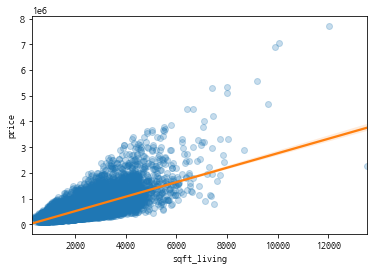

In [21]:
sns.regplot(x='sqft_living', y='price', data=df, 
            scatter_kws={'alpha':0.25}, line_kws={'color':'C1'});   # lowess=True 추가시 비선형 회귀식 피팅 

In [26]:
# 잔차 검증
# 더빈왓슨 독립성 검정 : 2이면 독립성, 0에 가까울수록 양의 상관, 4에 가까울수록 음의 상관 
# https://www.statsmodels.org/dev/generated/statsmodels.stats.stattools.durbin_watson.html
# https://www.statology.org/durbin-watson-test-python/ 
from statsmodels.stats.stattools import durbin_watson

durbin_watson(lr.resid)  # 2에 가깝기 때문에 독립성 가정 만족

1.9825552599878278

In [31]:
# 정규성 검증 : Ho 정규분포다 
from scipy.stats import shapiro

shapiro(lr.resid)  # 정규성 만족하지 않음 

ShapiroResult(statistic=0.8369508981704712, pvalue=0.0)

<AxesSubplot:>

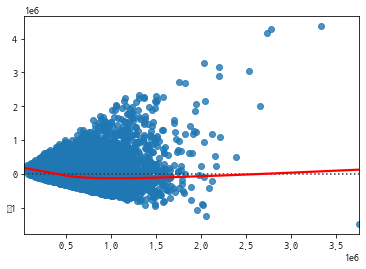

In [37]:
# 잔차분석 시각화 : 등분산 가정 벗어남 (p323)
sns.residplot(pred, lr.resid, lowess=True, line_kws=dict(color="r"))
#sns.residplot(data=df, x='sqft_living', y='price', lowess=True)  # 동일 결과

In [115]:
# QQ plot : 정규성 만족하기 어려움 (r383)
#import statsmodels.api as sm
#fig = sm.qqplot(lr.resid, fit=True, line='45') 

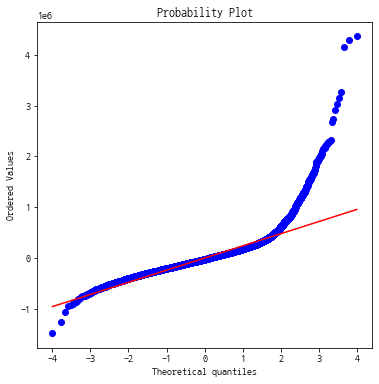

In [54]:
# QQ plot : 정규성 만족하기 어려움 (r383) --> 이차트가 더 깔끔
import scipy.stats as stats

fig, ax = plt.subplots(figsize=(6,6))
stats.probplot(lr.resid, plot=ax);

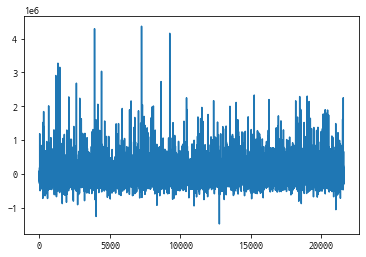

In [118]:
#검증 데이터에 대한 예측 : 특이값 있는지 확인
plt.plot(np.array(y).flatten() - pred, label="predFull");

### 다항회귀 : 단순

In [121]:
df = pd.read_csv('ADP_book_ver01/data/cereal.csv')

df = df.select_dtypes(exclude='object').query(" sugars >= 0").reset_index(drop=True)
df.tail(3)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
73,100,3,1,230,3.00,17.00,3,115,25,1,1.00,0.67,49.79
74,100,3,1,200,3.00,17.00,3,110,25,1,1.00,1.00,51.59
75,110,2,1,200,1.00,16.00,8,60,25,1,1.00,0.75,36.19


<AxesSubplot:>

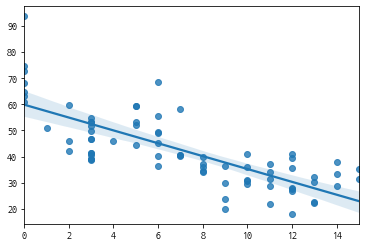

In [122]:
X = df['sugars'].values
y = df['rating'].values

sns.regplot(x=X, y=y)   # lmplot은 data가 지정되어야 함 sns.lmplot(x='sugars', y='rating', data=df)

In [123]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(53,) (23,) (53,) (23,)


In [108]:
X_train.reshape(-1,1).shape

(53, 1)

In [124]:
# 다항회귀 
from sklearn.preprocessing import PolynomialFeatures 

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train.reshape(-1,1))

from sklearn.linear_model import LinearRegression 
reg = LinearRegression()
reg.fit(X_poly, y_train)

X_test_poly = poly_reg.transform(X_test.reshape(-1,1))
pred = reg.predict(X_test_poly)
pred

array([36.88901409, 32.45862139, 31.75396899, 41.77297212, 32.45862139,
       41.77297212, 31.95644727, 51.99445352, 56.17375915, 31.75396899,
       44.79406   , 51.99445352, 31.43538917, 35.02614394, 36.88901409,
       51.99445352, 44.79406   , 33.54934638, 48.20122047, 33.54934638,
       31.95644727, 51.99445352, 35.02614394])

In [125]:
X_train[:5]

array([2, 0, 0, 9, 8])

In [126]:
X_poly[:5]

array([[ 1.,  2.,  4.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  9., 81.],
       [ 1.,  8., 64.]])

In [127]:
# 선형회귀 (비교용)
lr_reg = LinearRegression()
lr_reg.fit(X_train.reshape(-1,1), y_train)

lr_pred = lr_reg.predict(X_test.reshape(-1,1))
lr_pred

array([40.42053465, 32.82974242, 30.29947834, 45.4810628 , 32.82974242,
       45.4810628 , 22.70868611, 53.07185503, 55.60211911, 30.29947834,
       48.01132688, 53.07185503, 27.76921426, 37.89027057, 40.42053465,
       53.07185503, 48.01132688, 35.36000649, 50.54159096, 35.36000649,
       22.70868611, 53.07185503, 37.89027057])

In [169]:
from sklearn.metrics import mean_squared_error, r2_score 

print("다항회귀 RMSE ", np.sqrt(mean_squared_error(pred, y_test)))  # -> RMSE는 단순회귀보다 작다. 좋다!!! 
print("단순회귀 RMSE ", np.sqrt(mean_squared_error(lr_pred, y_test)))

print("다항회귀 R2 ", r2_score(y_test, pred))  # r2_score(true, pred)  >> 순서 꼭 맞출 것!!!! r2_score 쓰지 말기! 
print("단순회귀 R2 ", r2_score(y_test, lr_pred))  

print("다항회귀 ACC(결정계수) ", reg.score(X_test_poly, y_test))     # 회귀식 결정계수 (r2_score와 동일한 결과)  (**** score로 간단히)
print("단순회귀 ACC(결정계수) ", lr_reg.score(X_test.reshape(-1,1), y_test))  

다항회귀 RMSE  9.48687865227822
단순회귀 RMSE  9.695985755918286
다항회귀 R2  0.4593801436327408
단순회귀 R2  0.4352851095219278
다항회귀 ACC(결정계수)  0.4593801436327408
단순회귀 ACC(결정계수)  0.4352851095219278


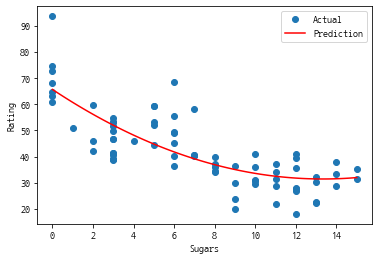

In [112]:
X_new = np.linspace(0, 15, 100).reshape(100,1)
X_new_poly = poly_reg.transform(X_new)
y_new = reg.predict(X_new_poly)

plt.plot(X, y, 'o', label='Actual')
plt.plot(X_new, y_new, 'r-', label='Prediction')
plt.legend(loc='upper right')
plt.xlabel('Sugars')
plt.ylabel('Rating')
plt.show()

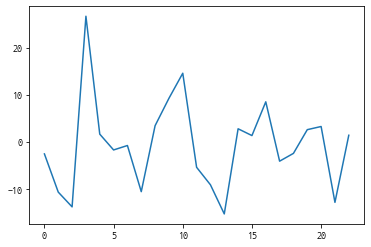

In [114]:
#검증 데이터에 대한 예측 : 특이값 있는지 확인
plt.plot(np.array(y_test).flatten() - pred, label="predFull");

In [178]:
########### 참고 : 결정계수(r2_score 또는 score), 수정결정계수 
# https://engineer-mole.tistory.com/240
from sklearn.datasets import load_boston

def adj_r2(r2, n, p):  ##### 수정결정계수 (r2, 관측수, 피처수)
    return 1 - (1-r2)*(n-1)/(n-p-1)

X = pd.DataFrame(load_boston().data, columns=load_boston().feature_names)
y = pd.DataFrame(load_boston().target, columns=['target'])

lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)

r2 = r2_score(y, y_pred)  # r2_score(true, pred) : 순서 유의!   
r2_adj = adj_r2(r2, X.shape[0], X.shape[1])

print("결정계수(score사용) : ", lr.score(X_b, y_b))
print("df.shape {}, 결정계수 {}, 수정결정계수 {}".format(df.shape, r2, r2_adj))

결정계수(score사용) :  0.7406426641094094
df.shape (77, 16), 결정계수 0.7406426641094094, 수정결정계수 0.7337897263724629


### 회귀모델 : 간단히 statsmodels로 적용하기 : summary에 일괄 출력 장점! 

- R2, 수정R2, AIC, p-value 확인 

In [181]:
import statsmodels.api as sm

X1 = sm.add_constant(X)  # statsmodels는 반드시 상수항 추가!!!!!!!
m = sm.OLS(y, X1) 
result = m.fit()
print(result.rsquared)
print(result.rsquared_adj)
result.summary()

0.7406426641094095
0.733789726372463


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 18 Nov 2022   Prob (F-statistic):          6.72e-135
Time:                        08:31:27   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 다항회귀 : 고차 

In [171]:
df = pd.read_csv('ADP_book_ver01/data/cereal.csv')

X = df.select_dtypes(exclude='object').iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(53, 12) (24, 12) (53,) (24,)


In [172]:
# 스케일링 
from sklearn.preprocessing import StandardScaler

sts = StandardScaler()
X_train = sts.fit_transform(X_train)
X_test = sts.transform(X_test)

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.transform(X_test)

print(X_poly.shape)
X_poly[1,:]  # 첫번째 행 : 12개 -> 91개 

(53, 91)


array([ 1.        , -2.73387494, -1.38781903, -0.98130676, -1.74533894,
       -0.85847626, -0.39166097, -1.45322423, -1.12897186, -1.18441958,
        0.95673744, -3.17596878,  0.79279271,  7.47407219,  3.79412367,
        2.68276997,  4.77153838,  2.34696674,  1.07075211,  3.9729333 ,
        3.08646786,  3.23805501, -2.61560052,  8.68270146, -2.16739613,
        1.92604167,  1.3618762 ,  2.42221459,  1.1914097 ,  0.54355455,
        2.01681224,  1.56680863,  1.64376004, -1.32777843,  4.40766992,
       -1.10025282,  0.96296296,  1.7127129 ,  0.84242856,  0.38433956,
        1.42605876,  1.10786772,  1.16227894, -0.93885292,  3.11659964,
       -0.77797285,  3.046208  ,  1.49833205,  0.68358114,  2.53636883,
        1.97043854,  2.06721361, -1.66983111,  5.54314197, -1.38369199,
        0.73698149,  0.33623165,  1.2475585 ,  0.96919554,  1.01679609,
       -0.82133638,  2.72649381, -0.68059373,  0.15339832,  0.56917121,
        0.44217421,  0.46389092, -0.37471672,  1.24390302, -0.31

In [173]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_poly, y_train)

pred = reg.predict(X_test_poly)
pred 

array([37.59365777, 23.79912528, 19.50650215, 66.28934622, 33.82185468,
       42.58510759, 32.01709009, 46.275773  , 59.57546899, 37.12204717,
       57.78262739, 48.74687415, 22.42279688, 24.30807045, 38.32922404,
       47.69980313, 55.01674942, 33.15142253, 43.34903096, 38.01911369,
       37.08899223, 35.88357612, 34.93679205, 46.73495405])

In [175]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print("RMSE ", np.sqrt(mean_squared_error(pred, y_test))) 
print("MAE ", mean_absolute_error(pred, y_test))
print("R2(r2_score) ", r2_score(y_test, pred))
print("R2(score) ", reg.score(poly_reg.transform(X_test), y_test))

RMSE  2.626268527173543
MAE  2.167325509220999
R2(r2_score)  0.9577874539432917
R2(score)  0.9577874539432917


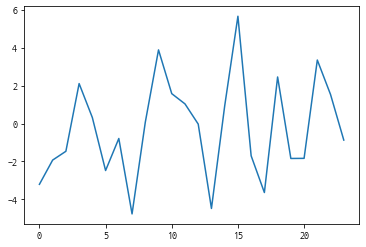

In [177]:
#검증 데이터에 대한 예측 : 특이값 있는지 확인
plt.plot(np.array(y_test).flatten() - pred, label="predFull")

### 다중회귀

In [186]:
# 다중공선성 검증 : p330
import statsmodels.api as sm 
import statsmodels.formula.api as smf

cars = pd.read_csv('ADP_book_ver01/data/Cars93.csv')
cars.columns = cars.columns.str.replace(".","")  # 변수명 콤마 제거 

formula = 'Price ~ EngineSize + RPM + Weight + Length + MPGcity + MPGhighway'
model = smf.ols(formula, data=cars)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     19.14
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           4.88e-14
Time:                        08:43:37   Log-Likelihood:                -302.94
No. Observations:                  93   AIC:                             619.9
Df Residuals:                      86   BIC:                             637.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -32.2157     17.812     -1.809      0.074     -67.625       3.193
EngineSize     4.4732      1.410      3.172      0.002       1.670       7.276
RPM            0.0071      0.001      5.138      0.000       0.004       0.010
Weight         0.0056      0.003      1.634      0.106      -0.001       0.012
Length        -0.0464      0.094     -0.496      0.621      -0.232       0.139
MPGcity       -0.3478      0.448     -0.776      0.440      -1.239       0.544
MPGhighway     0.0582      0.460      0.126      0.900      -0.856       0.973
==============================================================================
Omnibus:                       62.984   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              383.289
Skew:                           2.074   Prob(JB):                     5.89e-84
Kurtosis:                      12.039   Cond. No.                     1.61e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [188]:
cars[['Price', 'EngineSize', 'RPM', 'Weight', 'Length', 'MPGcity', 'MPGhighway']].corr()

,Price,EngineSize,RPM,Weight,Length,MPGcity,MPGhighway
Price,1.00,0.60,-0.00,0.65,0.50,-0.59,-0.56
EngineSize,0.60,1.00,-0.55,0.85,0.78,-0.71,-0.63
RPM,-0.00,-0.55,1.00,-0.43,-0.44,0.36,0.31
Weight,0.65,0.85,-0.43,1.00,0.81,-0.84,-0.81
Length,0.50,0.78,-0.44,0.81,1.00,-0.67,-0.54
MPGcity,-0.59,-0.71,0.36,-0.84,-0.67,1.00,0.94
MPGhighway,-0.56,-0.63,0.31,-0.81,-0.54,0.94,1.00


In [187]:
# 다중공선성 : 10이상시 다중공선성 존재 
from patsy import dmatrices 
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices(formula, data=cars, return_type='dataframe')

vif = [] 
for i in range(1, len(X.columns)):
    vif.append([variance_inflation_factor(X.values, i), X.columns[i]])
pd.DataFrame(vif, columns=['VIF', 'feats'])

,vif,feats
0,4.61,EngineSize
1,1.45,RPM
2,8.69,Weight
3,4.01,Length
4,13.67,MPGcity
5,12.94,MPGhighway


In [189]:
formula = 'Price ~ EngineSize + RPM + Weight + Length + MPGcity'  # MPGhighway 제외
model = smf.ols(formula, data=cars)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     23.22
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           9.60e-15
Time:                        08:49:29   Log-Likelihood:                -302.95
No. Observations:                  93   AIC:                             617.9
Df Residuals:                      87   BIC:                             633.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -32.1513     17.704     -1.816      0.073     -67.339       3.037
EngineSize     4.5082      1.375      3.279      0.001       1.776       7.241
RPM            0.0071      0.001      5.176      0.000       0.004       0.010
Weight         0.0054      0.003      1.766      0.081      -0.001       0.011
Length        -0.0410      0.083     -0.495      0.622      -0.206       0.124
MPGcity       -0.2988      0.225     -1.331      0.187      -0.745       0.148
==============================================================================
Omnibus:                       62.828   Durbin-Watson:                   1.439
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              381.157
Skew:                           2.069   Prob(JB):                     1.71e-83
Kurtosis:                      12.013   Cond. No.                     1.61e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

adj R2 비슷, AIC 하락. 변수별 p-value 작아짐 

### 변수선택법 

In [198]:
# 변수선택 코드 불러오기 
#!git clone https://github.com/YoonHanho/reg_var_select.git
import var_select as vs
vs?? # 물음표 두개 

fatal: destination path 'reg_var_select' already exists and is not an empty directory.


In [204]:
stepwise_best_model = stepwise_model(X=X, y=y)

Processed  6 models on 1 predictors in
Selected predictors: ['Weight', 'Intercept']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fa621a52e50>
forward
Processed  1 models on 0 predictors in 0.002180337905883789
Selected predictors: ['Intercept'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fa621bb8670>
Processed  5 models on 2 predictors in
Selected predictors: ['Weight', 'RPM', 'Intercept']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fa621a52880>
forward
Processed  2 models on 1 predictors in 0.00272369384765625
Selected predictors: ['Weight', 'Intercept'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fa621bb89a0>
Processed  4 models on 3 predictors in
Selected predictors: ['Weight', 'RPM', 'EngineSize', 'Intercept']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fa621a529a0>
forward
Processed  3 models on 2 pred

In [205]:
stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     37.98
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           6.75e-16
Time:                        09:12:05   Log-Likelihood:                -304.05
No. Observations:                  93   AIC:                             616.1
Df Residuals:                      89   BIC:                             626.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Weight         0.0073      0.002      3.372      0.001       0.003       0.012
RPM            0.0071      0.001      5.208      0.000       0.004       0.010
EngineSize     4.3054      1.325      3.249      0.002       1.673       6.938
Intercept    -51.7933      9.106     -5.688      0.000     -69.887     -33.699
==============================================================================
Omnibus:                       62.441   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              361.880
Skew:                           2.076   Prob(JB):                     2.62e-79
Kurtosis:                      11.726   Cond. No.                     8.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [206]:
stepwise_best_model.predict()

array([20.33244015, 26.8996387 , 23.83232493, 24.05045884, 30.19223491,
       15.52094877, 23.86095473, 30.98119797, 24.04273298, 24.72003535,
       39.20207837, 12.68520798, 14.8301914 , 19.04715031, 17.81135479,
       25.64238163, 24.37196619, 27.96884668, 32.8060775 , 25.58368672,
       19.03655003, 22.4353744 , 13.74894781, 11.15543185, 14.62838692,
       23.54465077, 15.42821124, 31.36821274, 13.93072607, 29.81121027,
        2.70119118, 20.47928215,  7.47352375, 11.47548417, 15.55271398,
       22.34349488, 19.36233149, 26.53753722,  5.2864199 , 11.41219881,
       20.10028985, 13.62099333, 19.52290919, 10.7460581 , 17.5854594 ,
       10.66461274, 20.37338624, 39.24416316, 23.54607016, 29.25958497,
       22.65837945, 30.13958547,  7.4829497 , 12.72843148, 20.30554608,
       23.76278467, 20.98055134, 15.53268775, 26.64514914, 13.71417768,
       17.78246401, 13.93072607, 30.82287797, 16.17904729, 20.45669783,
       24.99745742, 21.29201979, 21.8467805 , 15.59366007, 25.64

In [208]:
stepwise_best_model.resid

0    -4.43
1     7.00
2     5.27
3    13.65
4    -0.19
      ... 
88    0.00
89    0.32
90    1.45
91    4.57
92    0.57
Length: 93, dtype: float64

In [209]:
# 잔차 검증
# 더빈왓슨 독립성 검정 : 2이면 독립성, 0에 가까울수록 양의 상관, 4에 가까울수록 음의 상관 
# https://www.statsmodels.org/dev/generated/statsmodels.stats.stattools.durbin_watson.html
# https://www.statology.org/durbin-watson-test-python/ 
from statsmodels.stats.stattools import durbin_watson
durbin_watson(stepwise_best_model.resid) 

1.4060821562837071

In [210]:
# 정규성 검증 : Ho 정규분포다 
from scipy.stats import shapiro
shapiro(stepwise_best_model.resid)  # 정규성 만족

ShapiroResult(statistic=0.8587311506271362, pvalue=5.97627476395246e-08)

<AxesSubplot:>

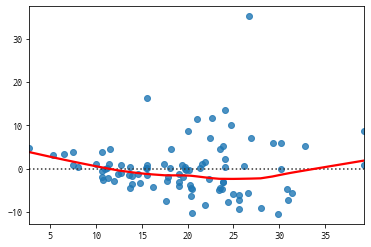

In [213]:
# 잔차분석 시각화 : 등분산 가정 벗어남 (p323)
sns.residplot(stepwise_best_model.predict(), stepwise_best_model.resid, lowess=True, line_kws=dict(color="r"))

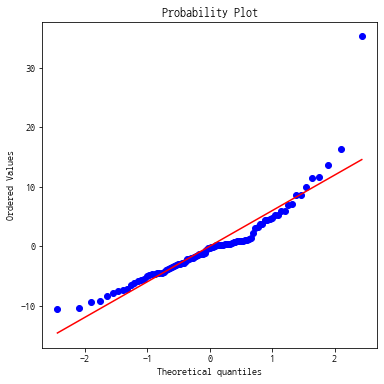

In [214]:
# QQ plot : 정규성 만족하기 어려움 (r383) --> 이차트가 더 깔끔
import scipy.stats as stats
fig, ax = plt.subplots(figsize=(6,6))
stats.probplot(stepwise_best_model.resid, plot=ax);

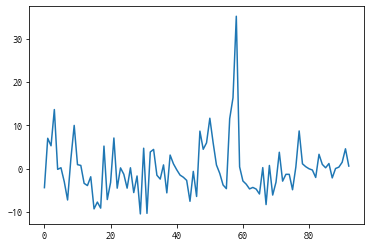

In [216]:
#검증 데이터에 대한 예측 : 특이값 있는지 확인
plt.plot(np.array(y).flatten() - stepwise_best_model.predict(), label="predFull");

### 정규회귀 

In [219]:
### 통계분석 
# 1. 데이터를 8:2로 분할하고 선형회귀를 적용후, 결정계수와 rmse 구하기 
#!pip install mglearn
import mglearn

X, y = mglearn.datasets.load_extended_boston()

In [221]:
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.metrics import mean_squared_error 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 선형회귀
lr = LinearRegression()
lr.fit(X_train, y_train)
print("결정계수 : ", lr.score(X_test, y_test))
print("RMSE : ", np.sqrt(mean_squared_error(lr.predict(X_test), y_test)))

결정계수 :  0.6486839499987778
RMSE :  5.408558693330343


In [226]:
# 릿지회귀 : 알파 0부터 1까지 0.1단위로 학습하여 가장 결정계수 높은 알파 찾기 
alpha = np.arange(0, 1.1, 0.1)

ridge = Ridge(normalize=True)
param_grid = {'alpha':alpha}
ridge_model = GridSearchCV(ridge, param_grid)
ridge_model.fit(X_train, y_train)

print("최적모델 : ", ridge_model.best_params_)
print("결정계수 : ", ridge_model.score(X_test, y_test))
print("RMSE : ", np.sqrt(mean_squared_error(ridge_model.predict(X_test), y_test)))

최적모델 :  {'alpha': 0.1}
결정계수 :  0.7922741598687775
RMSE :  4.158893636906414


In [227]:
# 라쏘회귀 : 알파 0부터 1까지 0.1단위로 학습하여 가장 결정계수 높은 알파 찾기 
lasso = Lasso(normalize=True)
param_grid = {'alpha':alpha}
lasso_model = GridSearchCV(lasso, param_grid)
lasso_model.fit(X_train, y_train)

print("최적모델 : ", lasso_model.best_params_)
print("결정계수 : ", lasso_model.score(X_test, y_test))
print("RMSE : ", np.sqrt(mean_squared_error(lasso_model.predict(X_test), y_test)))

최적모델 :  {'alpha': 0.1}
결정계수 :  0.6764782303499448
RMSE :  5.190202543533811


In [237]:
# 릿지모델 추가로 그리드서치 더 해 봄 
params = {'alpha' : [0, 0.1, 1.0, 10],
          'normalize' : [True, False],
          'max_iter' : [500, 1000],
          'solver' : ['auto', 'svd', 'cholesky']}

ridge = Ridge()
ridge_model = GridSearchCV(ridge, params)
ridge_model.fit(X_train, y_train)

print("최적모델 : ", ridge_model.best_params_)
print("결정계수 : ", ridge_model.score(X_test, y_test))
print("RMSE : ", np.sqrt(mean_squared_error(ridge_model.predict(X_test), y_test)))

최적모델 :  {'alpha': 0.1, 'max_iter': 500, 'normalize': False, 'solver': 'svd'}
결정계수 :  0.7974222058926244
RMSE :  4.107035627850682


In [238]:
# 서포트벡터 회귀 
from sklearn.svm import SVR 
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_scaler = mms.fit_transform(X_train)
X_test_scaler = mms.transform(X_test)

svr = SVR()
params = {'kernel':['rbf', 'linear', 'poly'],
          'C':[0.1, 1, 10]}

svr_model = GridSearchCV(svr, params)
svr_model.fit(X_train_scaler, y_train)

print("최적모델 : ", svr_model.best_params_)
print("결정계수 : ", svr_model.score(X_test_scaler, y_test))
print("RMSE : ", np.sqrt(mean_squared_error(svr_model.predict(X_test_scaler), y_test)))

최적모델 :  {'C': 10, 'kernel': 'linear'}
결정계수 :  0.7562525609640172
RMSE :  4.50508077463113


In [249]:
%%time   
# 랜덤포레스트회귀 : 그리드서치 오래걸림 ㄷㄷ 
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
params = {'criterion' : ["squared_error", "absolute_error", "poisson"],    
          'max_depth' : [1,3,5]}  

rfr_model = GridSearchCV(rfr, params)
rfr_model.fit(X_train, y_train)

print("최적모델 : ", rfr_model.best_params_)
print("결정계수 : ", rfr_model.score(X_test, y_test))
print("RMSE : ", np.sqrt(mean_squared_error(rfr_model.predict(X_test), y_test)))

최적모델 :  {'criterion': 'poisson', 'max_depth': 5}
결정계수 :  0.7842465637364158
RMSE :  4.238492432700937
CPU times: user 52.4 s, sys: 56 ms, total: 52.4 s
Wall time: 52.5 s


In [255]:
%%time
# Bagging 회귀 : oob 활용 가능(test, train없이도 정확도 예측)
from sklearn.ensemble import BaggingRegressor 
from sklearn.tree import DecisionTreeRegressor 
bag = BaggingRegressor(base_estimator=DecisionTreeRegressor(), oob_score=True)
bag_model = bag.fit(X_train, y_train)  

print("OOB Score : ", bag_model.oob_score_)  # OOB스코어는 X, y만으로도 나옴
print("결정계수 : ", bag_model.score(X_test, y_test))
print("RMSE : ", np.sqrt(mean_squared_error(bag_model.predict(X_test), y_test)))

OOB Score :  0.8431694879390393
결정계수 :  0.7597310758378819
RMSE :  4.472819301067281
CPU times: user 120 ms, sys: 4 ms, total: 124 ms
Wall time: 123 ms


In [203]:
#### 변수선택법 소스코드 #########
import pandas as pd
import numpy as np

import statsmodels.api as sm 
import statsmodels.formula.api as smf 

import time
import itertools


def processSubset(X,y, feature_set):
            model = sm.OLS(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
# 전진선택법
def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['Intercept']) if p not in predictors]
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y,            feature_set=predictors+[p]+['Intercept']))
        
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)
    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in")
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model   


def forward_model(X,y):

    Fmodels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    
    # 미리 정의된 데이터 변수
    predictors = []
    
    # 변수 1~10개 : 0-9 -> 1-10
    for i in range(1,len(X,columns.difference(['const']))+1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result["AIC"] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:",(toc-tic), "seconds.")
    
    return (Fmodels['model'][len(Fmodels['model'])])
    

        
# 후진소거법
def backward(X,y,predictors):
    tic = time.time()
    results = []
    
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) -1):
        results.append(processSubset(X=X, y= y,        feature_set = list(combo)+['Intercept']))
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on",          len(predictors) -1, "predictors in", (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,         'AIC:',best_model[0] )

    return best_model   


def backward_model(X,y) :
    Bmodels = pd.DataFrame(columns=["AIC","model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y= train_y, predictors=predictors)
        if Backward_result['AIC'] > Bmodel_before :
                break
        Bmodels.loc[len(predictors) -1] = Backward_result
        predictors = Bmodel.loc[len(predictors) - 1]['model'].model.exog_names
        Bmodel_before = Backward_result["AIC"]
        predictors = [k for k in predictors if k != 'const']
    
    toc = time.time()
    print("Total elapsed time:",(toc-tic),"seconds.")
    return (Bmodels["model"].dropna().iloc[0])



# 단계적 선택법
def stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['Intercept'])['AIC']

    for i in range(1, len(X.columns.difference(['Intercept'])) +1):
        Forward_result = forward(X=X, y=y, predictors=predictors) 
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k !='Intercept']
        Backward_result = backward(X=X, y=y, predictors=predictors)

        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k !='Intercept']
            print('backward')

        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return (Stepmodels['model'][len(Stepmodels['model'])])